# Insights From City Supply and Demand Data
Project to improve some Data Science skills, namely EDA (exploratory data analysis)

## 0 - Pre-requisites & Environment

001.Let's start by setting up the environment and preparing to run the notebook.

Import all lybraries and dependencies for visualizations, dataframe and tests

In [187]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv

import pandas as pd
# some settings for Data Visualization
pd.options.display.float_format='{:.4f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
plt.rcParams['figure.figsize'] = [8,8]
sns.set(style='darkgrid')

# for data treatment:
from datetime import datetime, timedelta
import numpy as np
ipytest.autoconfig(raise_on_error=True)

# for  logging and tests
import logging
import ipytest
import warnings
warnings.filterwarnings("ignore")

# for file and filesystem configuration and treatment
import sys
import json
from pathlib import Path

CODE_FOLDER = Path("code")
sys.path.extend([f"./{CODE_FOLDER}"])
print(sys.path)

DATA_FILEPATH = "UberRequestData.csv" # <- original

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv
['C:\\Program Files\\Python310\\python310.zip', 'C:\\Program Files\\Python310\\DLLs', 'C:\\Program Files\\Python310\\lib', 'C:\\Program Files\\Python310', 'c:\\Users\\jcz\\GitHub\\ml.school\\CitySupply\\.venvCS', '', 'c:\\Users\\jcz\\GitHub\\ml.school\\CitySupply\\.venvCS\\lib\\site-packages', 'c:\\Users\\jcz\\GitHub\\ml.school\\CitySupply\\.venvCS\\lib\\site-packages\\win32', 'c:\\Users\\jcz\\GitHub\\ml.school\\CitySupply\\.venvCS\\lib\\site-packages\\win32\\lib', 'c:\\Users\\jcz\\GitHub\\ml.school\\CitySupply\\.venvCS\\lib\\site-packages\\Pythonwin', './code', './code', './code', './code', './code', './code', './code']


## 1 - Exploratory Data Analysis

Let's run Exploratory Data Analysis on the [UberRequestData] dataset.

Goal is to understand the data and the data and the problem we are trying to solve.

### 10.Dataset & Statistics

101.Load the dataset:

In [188]:
# import numpy as np
# import pandas as pd

pdUberRequests = pd.read_csv(DATA_FILEPATH)
pdUberRequests.head()

,RequestID,PickupPoint,DriverID,Status,RequestTimestamp,DropTimestamp
0,619,Airport,1.0000,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0000,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0000,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0000,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0000,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


102.Get the summary statistics for the features in our dataset.

In [189]:
# Dimensions of df (rows, columns)
pdUberRequests.shape

(6745, 6)

In [190]:
pdUberRequests.describe(include="all")

,RequestID,PickupPoint,DriverID,Status,RequestTimestamp,DropTimestamp
count,6745.0000,6745,4095.0000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.6449,NaN,149.5013,NaN,NaN,NaN
std,1955.0997,NaN,86.0520,NaN,NaN,NaN
min,1.0000,NaN,1.0000,NaN,NaN,NaN
25%,1691.0000,NaN,75.0000,NaN,NaN,NaN
50%,3387.0000,NaN,149.0000,NaN,NaN,NaN
75%,5080.0000,NaN,224.0000,NaN,NaN,NaN


In [191]:
# Data datatypes + info - could use `pdUberRequests.dtypes`, but `info()` is more descriptive
pdUberRequests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RequestID         6745 non-null   int64  
 1   PickupPoint       6745 non-null   object 
 2   DriverID          4095 non-null   float64
 3   Status            6745 non-null   object 
 4   RequestTimestamp  6745 non-null   object 
 5   DropTimestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [192]:
pdUberRequests.dtypes

RequestID             int64
PickupPoint          object
DriverID            float64
Status               object
RequestTimestamp     object
DropTimestamp        object
dtype: object

103.Display the distribution of values for the two categorical columns in our data:

In [193]:
PickupPoint_distribution = pdUberRequests["PickupPoint"].value_counts()
Status_distribution = pdUberRequests["Status"].value_counts()

print(PickupPoint_distribution, end="\n\n")
print(Status_distribution)

PickupPoint
City       3507
Airport    3238
Name: count, dtype: int64

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


### 11. Data Cleaning & Preparation

111.Check for duplicates in the dataset.

In [194]:
# check if any duplicates record exists (for complete row duplicate use `sum(pdUberRequests.duplicated()) == 0`)
key2CheckDUPs = ["RequestID","PickupPoint"]
if (sum(pdUberRequests.duplicated(subset = key2CheckDUPs)) == 0):
      print("No Duplicates for key")
else: print(pdUberRequests[pdUberRequests.duplicated(subset=key2CheckDUPs, keep=False)].drop_duplicates())

No Duplicates for key


112.Check for any missing values in the dataset.

In [195]:
pdUberRequests.isna().sum()

RequestID              0
PickupPoint            0
DriverID            2650
Status                 0
RequestTimestamp       0
DropTimestamp       3914
dtype: int64

In [196]:
# Calculating the Missing Values % contribution in DF
df_null = pdUberRequests.isna().mean().round(4)*100

df_null.sort_values(ascending=False)

DropTimestamp      58.0300
DriverID           39.2900
RequestID           0.0000
PickupPoint         0.0000
Status              0.0000
RequestTimestamp    0.0000
dtype: float64

In [197]:
# Just for the cases that had Cars available:
pdUberRequests[pdUberRequests['Status'] != 'No Cars Available'].isna().sum()

RequestID              0
PickupPoint            0
DriverID               0
Status                 0
RequestTimestamp       0
DropTimestamp       1264
dtype: int64

112.1. If it makes sense, get rid of the missing values. Possible strategies:

    i. replace by most common value
    ii. remove sample row from input dataset
    iii. remove column (if indeed there are so many missing it doesn't make sense to consider feature)
    iv. replace by least common value
    v. replace by mean

In [198]:
# # example with i.: most frequent
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="most_frequent")
# pdUberRequests.iloc[:, :] = imputer.fit_transform(pdUberRequests)

# # Let's display again the number of missing values:
# pdUberRequests.isna().sum()

## 12.Treat the Datetime fields

121.1 Convert from String to Datetime

In [199]:
import re
# Define the regex pattern to match and capture day, month, year, hour, minute and seconds components
dttPattern = r'(\d{1,2})[-/](\d{1,2})[-/](\d{4}) (\d{1,2}):(\d{1,2}):(\d{1,2})'

# Function to pad single-digit numbers with a leading zero
def pad_with_zero(match):
    return match.group(1).zfill(2) + '-' + match.group(2).zfill(2) + '-' + match.group(3) + ' ' + match.group(4).zfill(2) + ':' + match.group(5).zfill(2) + ':' + match.group(6).zfill(2)

# Function to preprocess datetime strings and ensure consistent formatting
def preprocess_datetime(datetime_str):
    return re.sub(dttPattern, pad_with_zero, datetime_str+":00" if datetime_str.count(':')==1 else datetime_str) # to cope with seconds

In [200]:
pdUberRequests['RequestTimestamp'] = pdUberRequests['RequestTimestamp'].astype(str)
pdUberRequests['RequestTimestamp'] = pdUberRequests['RequestTimestamp'].apply(preprocess_datetime)
pdUberRequests['RequestTimestamp'] = pd.to_datetime(pdUberRequests['RequestTimestamp'], format="%d-%m-%Y %H:%M:%S")
#pdUberRequests.head()

In [201]:
pdUberRequests['DropTimestamp'] = pdUberRequests['DropTimestamp'].astype(str)
pdUberRequests['DropTimestamp'] = pdUberRequests['DropTimestamp'].apply(preprocess_datetime)
pdUberRequests['DropTimestamp'] = pd.to_datetime(pdUberRequests['DropTimestamp'], format="%d-%m-%Y %H:%M:%S")
pdUberRequests.head()

,RequestID,PickupPoint,DriverID,Status,RequestTimestamp,DropTimestamp
0,619,Airport,1.0000,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0000,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0000,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0000,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0000,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


121.2 Extract the Day, WeekDay and Hour from the Request Timestamp

In [202]:
# Extract the day from request timestamp
RequestDay = pdUberRequests['RequestTimestamp'].dt.day
RequestDay.value_counts()
pdUberRequests['RequestDay'] = RequestDay
#pdUberRequests.head()

In [203]:
# Extract the day from request timestamp
RequestWeekDay = (pdUberRequests['RequestTimestamp'].dt.dayofweek + 2) % 7
RequestWeekDay.value_counts()
pdUberRequests['RequestWeekDay'] = RequestWeekDay
#pdUberRequests.head()

In [204]:
# Extract the hour from the request timestamp
RequestHour = pdUberRequests['RequestTimestamp'].dt.hour
RequestHour.value_counts()
pdUberRequests['RequestHour'] = RequestHour
pdUberRequests.head()

,RequestID,PickupPoint,DriverID,Status,RequestTimestamp,DropTimestamp,RequestDay,RequestWeekDay,RequestHour
0,619,Airport,1.0000,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,2,11
1,867,Airport,1.0000,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,2,17
2,1807,City,1.0000,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,3,9
3,2532,Airport,1.0000,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,3,21
4,3112,City,1.0000,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,4,8


## 13.Data Visualizations

### 131.Daily Plot by Hour

131.1. Requests by Status

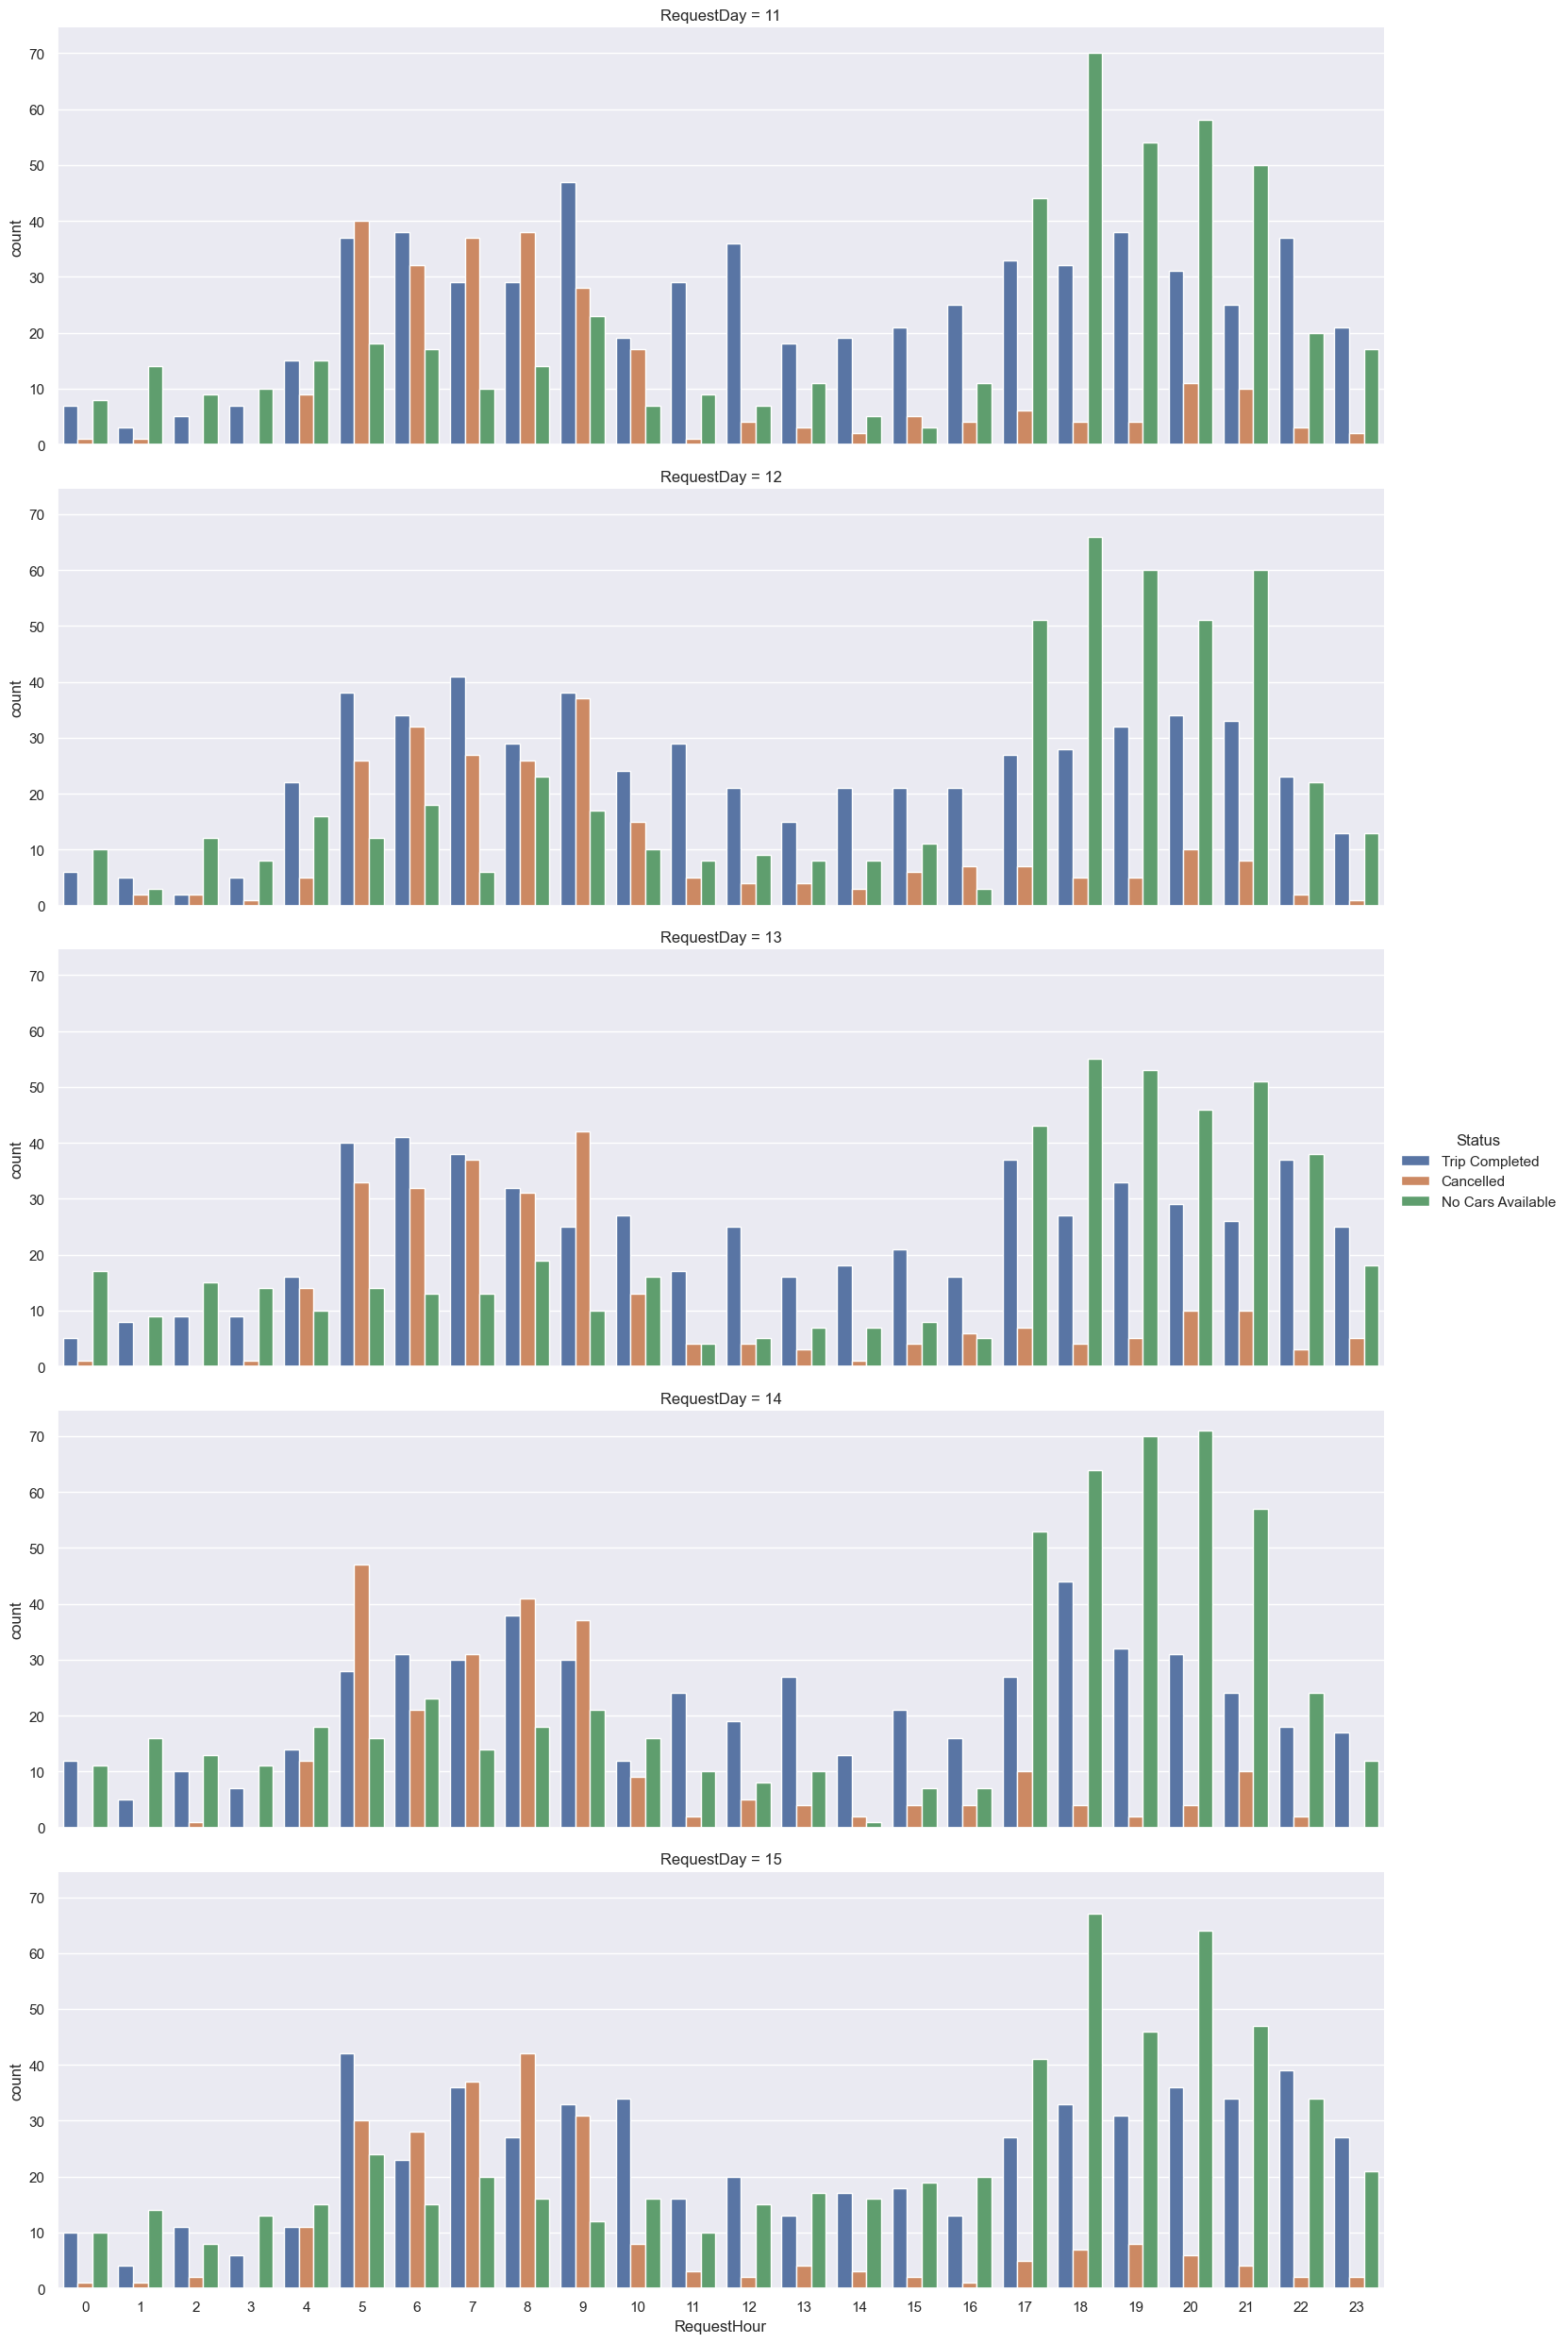

In [205]:
# Factor plot of hour and day with respect to Status
sns.catplot(x = 'RequestHour', hue = 'Status', row = 'RequestDay', data = pdUberRequests, kind='count', height=5, aspect=3)

In [206]:
# Inference:
# No Cars available sistuation occurs primarly at evening hours from 5PM to 10 PM.
# Frequent Cancellations were encountered in morning hours.

131.2. Requests by Pickup Point

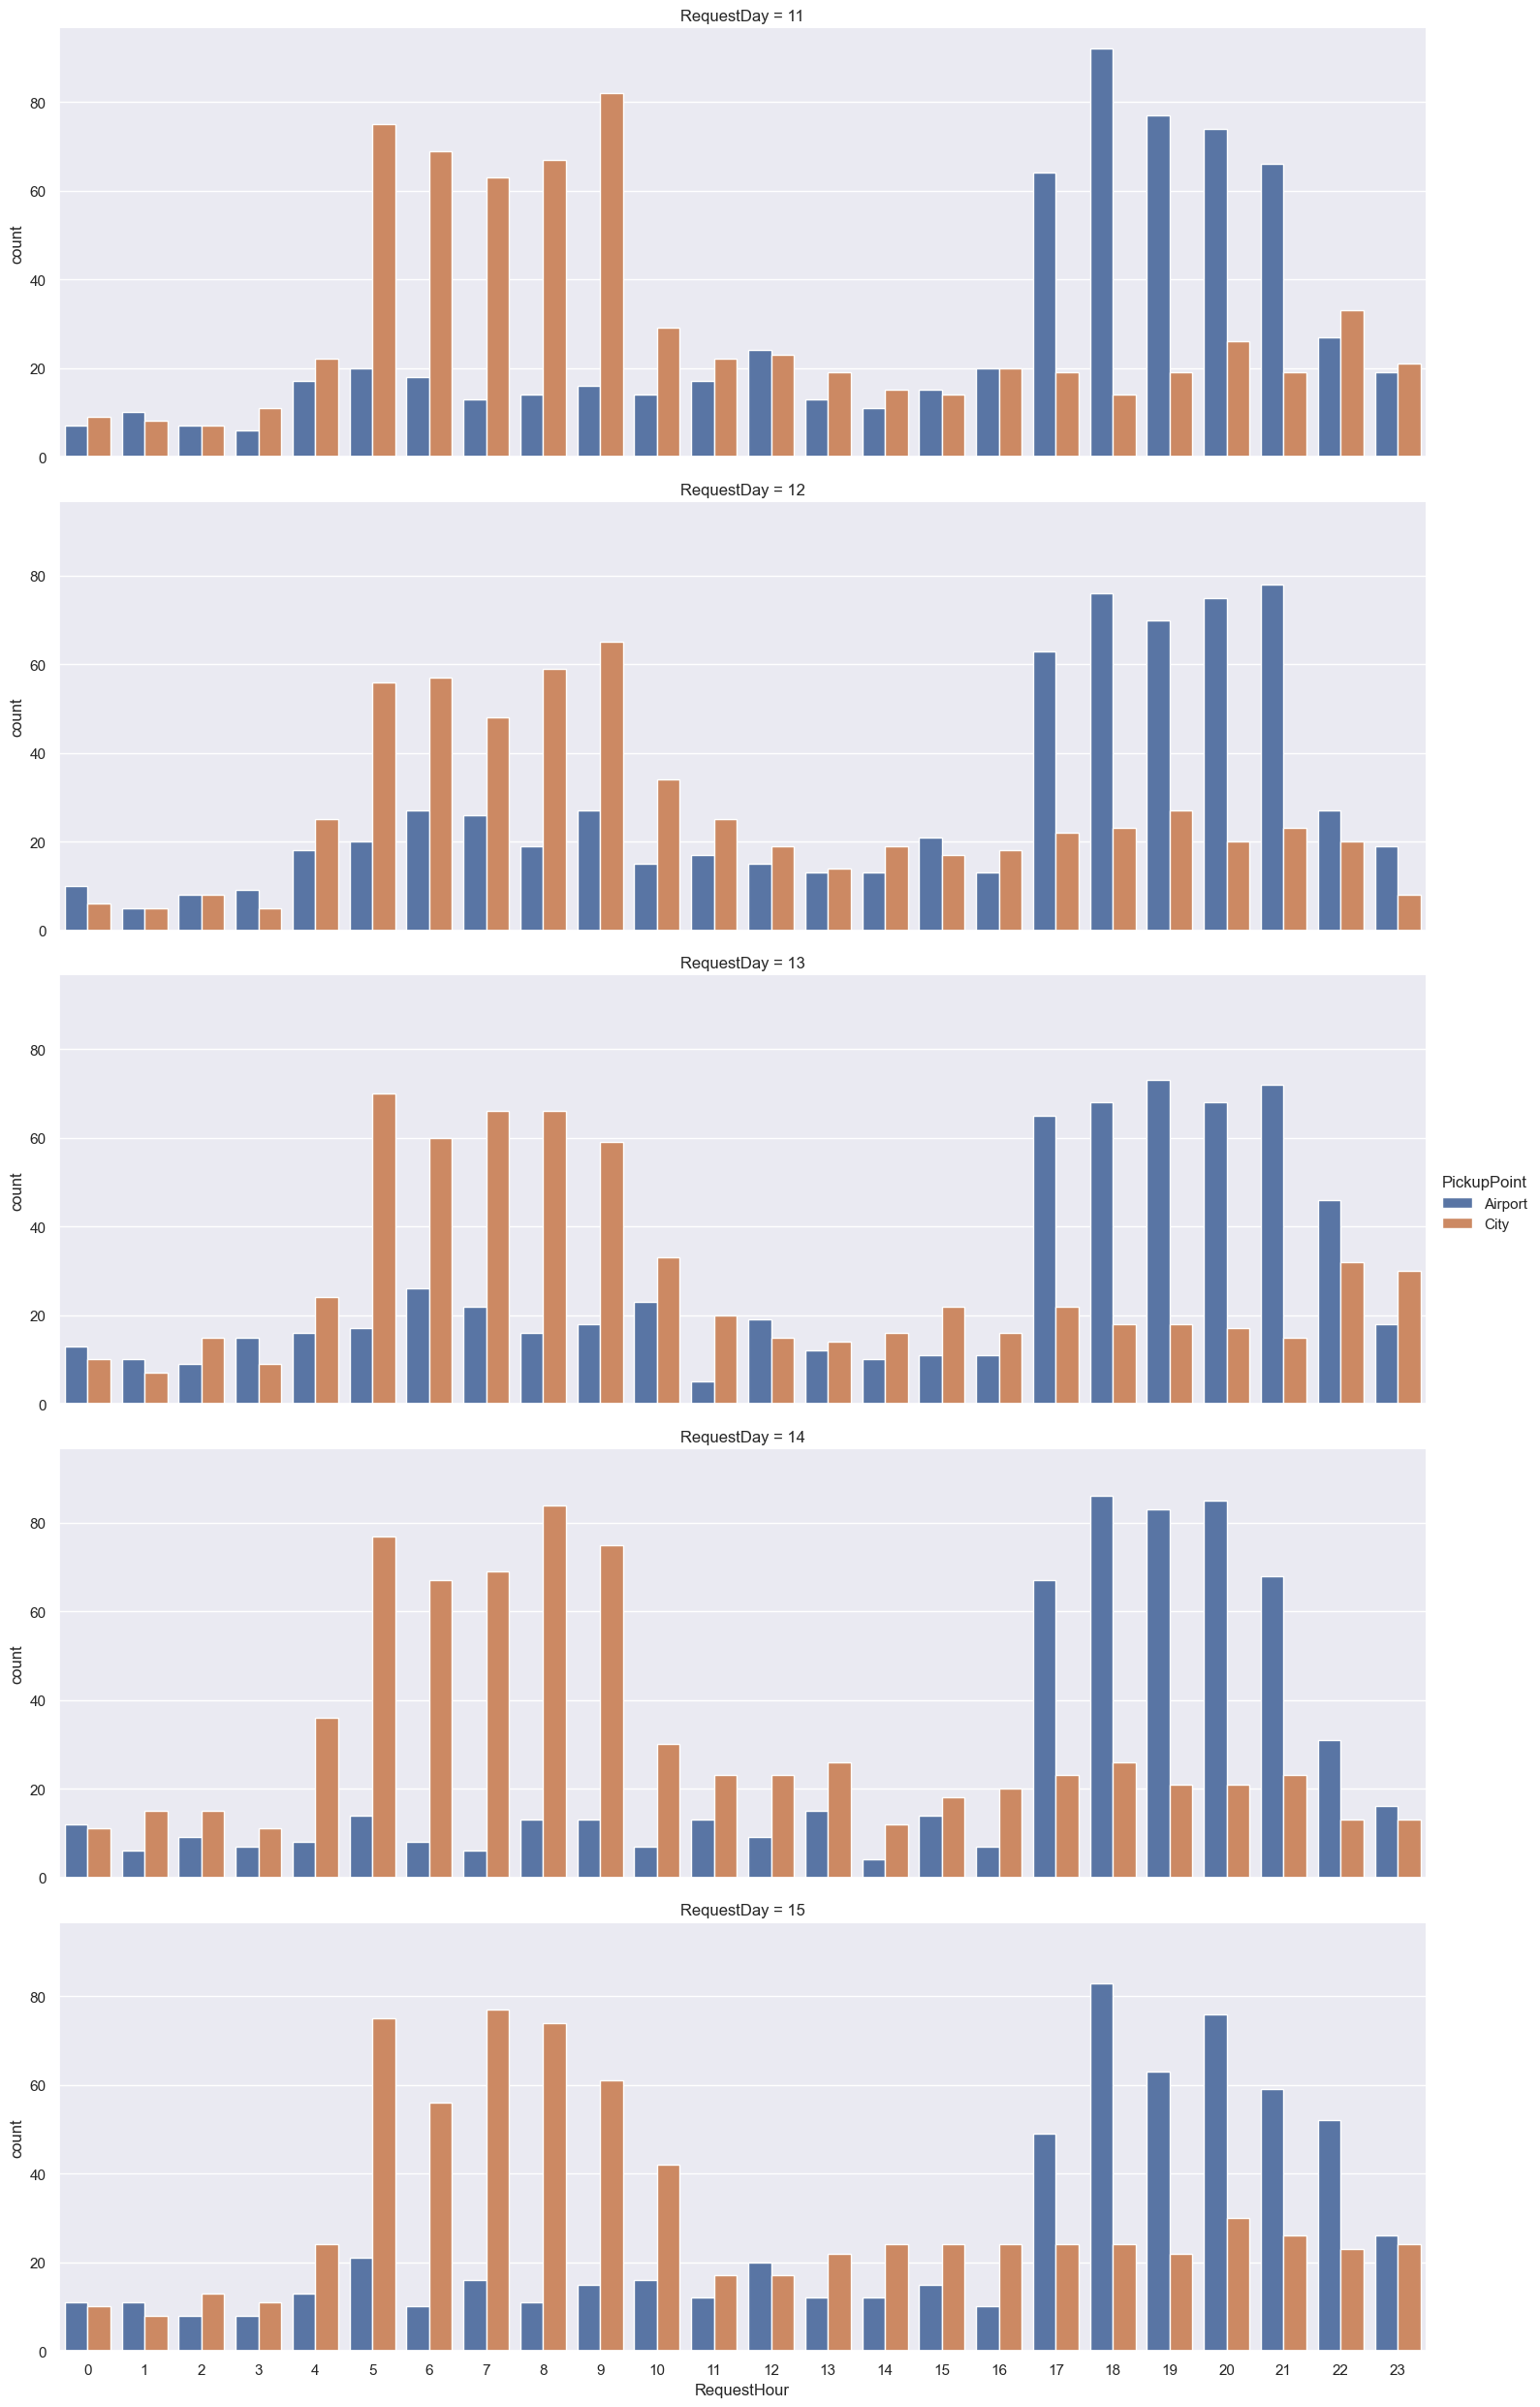

In [207]:
# Factor plot of hour and day with respect to Pickup Point
sns.catplot(x = 'RequestHour', hue = 'PickupPoint', row = 'RequestDay', data = pdUberRequests, kind='count', height=5, aspect=3)

In [208]:
# Inference:
# Most of the pickups encountered at daytime is from city suggesting more people travel to the airport in day hours.
# The pickups from Airport at evening hours are more and it suggests most people land in evening hours.

131.3. Agregated by Hour (without day)

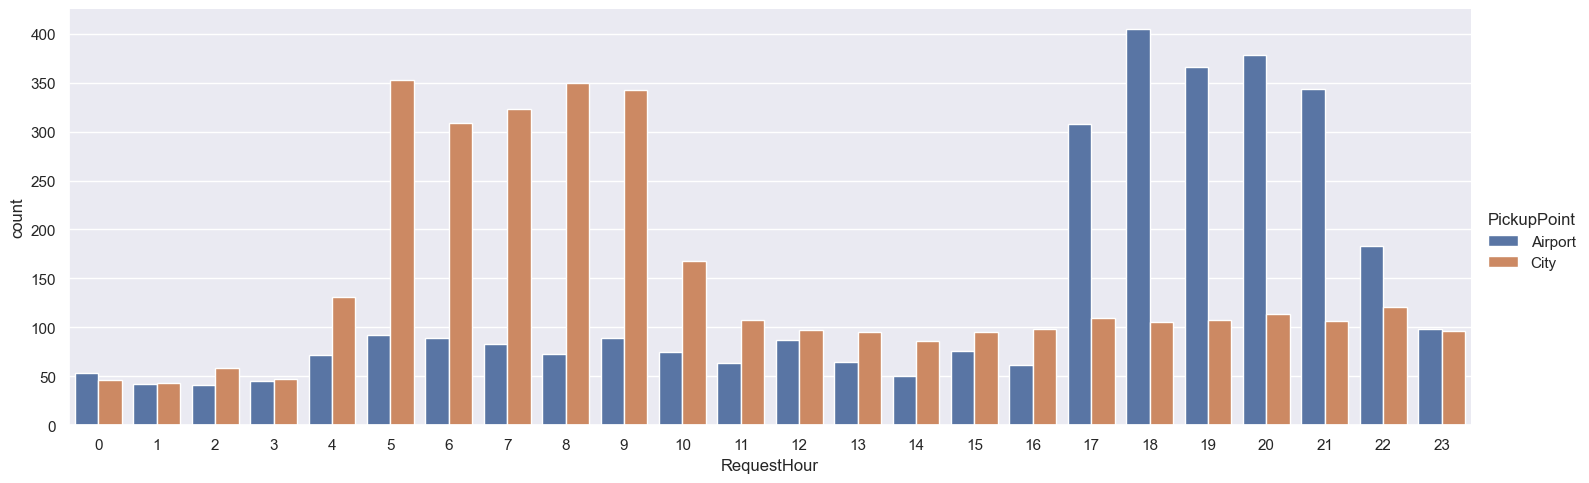

In [209]:
# Aggregate count plot for all days w.r.t. to Pickup point
sns.catplot(x = 'RequestHour', hue = 'PickupPoint', data = pdUberRequests, kind = 'count', height=5, aspect=3)

131.4. Create Time Slots to group hours (time periods)

In [210]:
# Creating timeslots for various time period of the day
time_hour = [0,5,10,17,22,24]
time_slots =['EarlyMorning','MorningRush','DayTime','EveningRush','LateNight']
pdUberRequests['TimeSlot'] = pd.cut(pdUberRequests['RequestHour'], bins = time_hour, labels = time_slots)
pdUberRequests.head()

,RequestID,PickupPoint,DriverID,Status,RequestTimestamp,DropTimestamp,RequestDay,RequestWeekDay,RequestHour,TimeSlot
0,619,Airport,1.0000,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,2,11,DayTime
1,867,Airport,1.0000,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,2,17,DayTime
2,1807,City,1.0000,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,3,9,MorningRush
3,2532,Airport,1.0000,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,3,21,EveningRush
4,3112,City,1.0000,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,4,8,MorningRush


Text(0, 0.5, 'Number of occurence ')

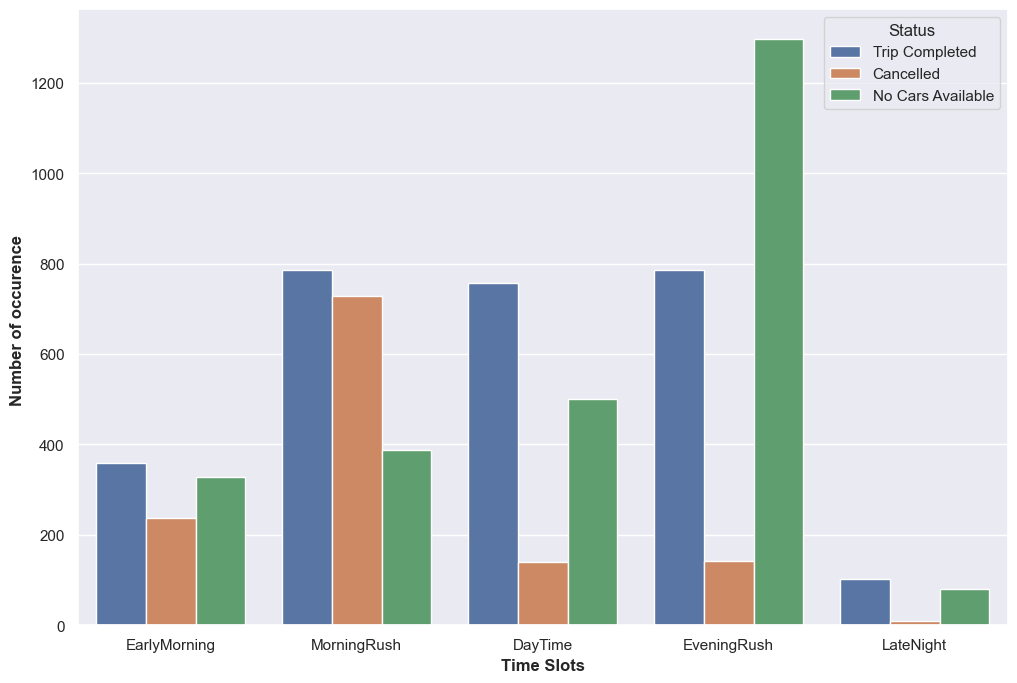

In [211]:
# Visualizing the different time slots wrt status
plt.rcParams['figure.figsize'] = [12,8]
sns.countplot(x = 'TimeSlot', hue = 'Status', data = pdUberRequests)
plt.xlabel("Time Slots",fontweight = 'bold')
plt.ylabel("Number of occurence ",fontweight = 'bold')

In [ ]:
# Inference:
# Cars not available situation arises mostly in evening hours.
# Most of the Cancellation happens in morning hours.

131.5. Evaluate different Time Slots

<Axes: xlabel='PickupPoint', ylabel='count'>

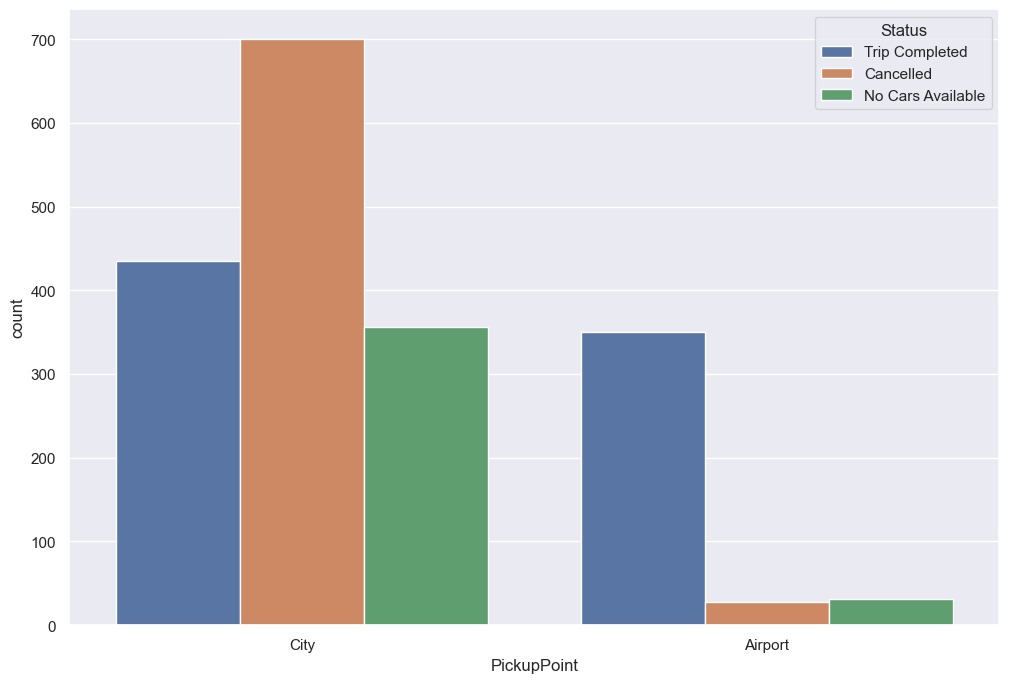

In [212]:
# as we can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
morningRush = pdUberRequests[pdUberRequests['TimeSlot'] == 'MorningRush']
sns.countplot(x = 'PickupPoint', hue = 'Status', data = morningRush)

In [ ]:
# Inference:
# The Cancellation situation is a problem for the trip from City to airport in morning hours.

<Axes: xlabel='PickupPoint', ylabel='count'>

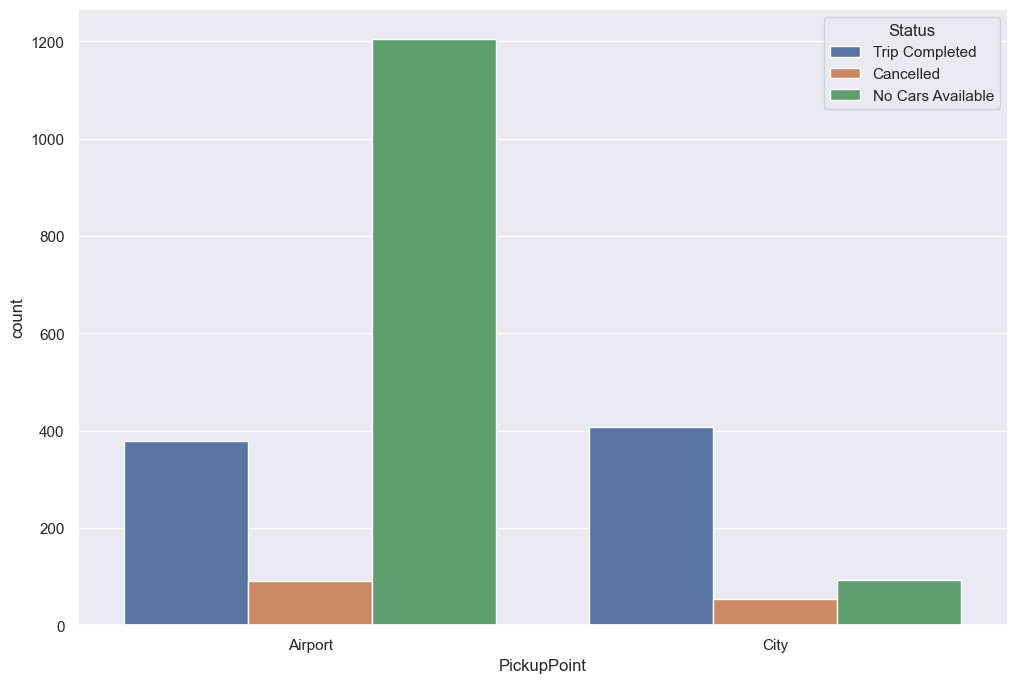

In [213]:
# as we can see in the above plot the higest number of no cars available are in the "Evening Rush" time slot
eveningRush = pdUberRequests[pdUberRequests['TimeSlot'] == 'EveningRush']
sns.countplot(x = 'PickupPoint', hue = 'Status', data = eveningRush)

In [ ]:
# Inference:
# The No cars available situation is a problem for the trip from airport to city in evening hours.

131.6. Evaluate with Pie Chart

In [233]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    dataframe.reset_index(inplace=True) # Reset index of city_count DataFrame
    # Plot pie chart
    labels = dataframe['Status']
    sizes = dataframe['count']
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

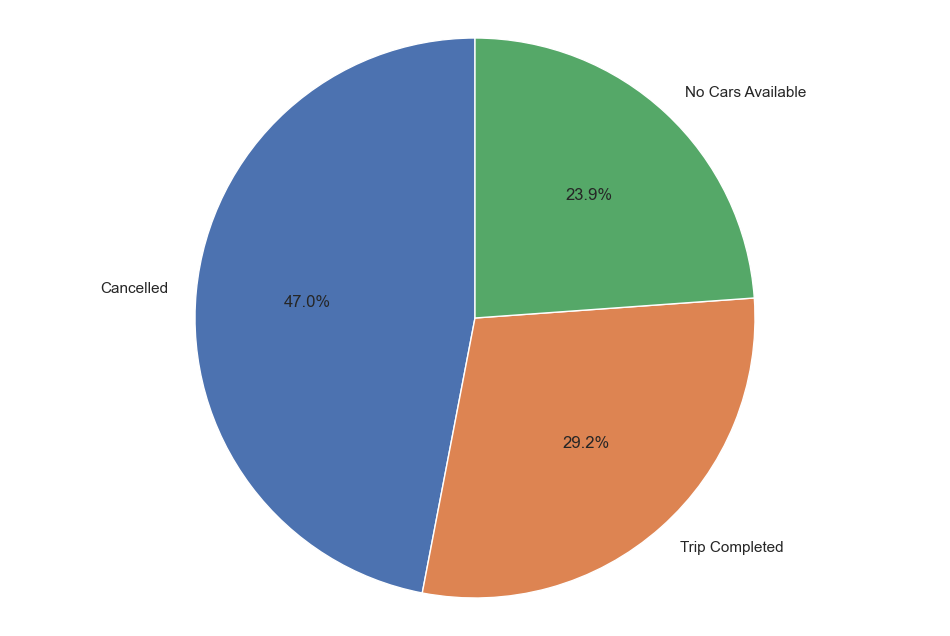

In [234]:
city = pdUberRequests.loc[(pdUberRequests["PickupPoint"] == "City") & (pdUberRequests["TimeSlot"] == "MorningRush")]
city_count = pd.DataFrame(city["Status"].value_counts())
pie_chart(city_count)

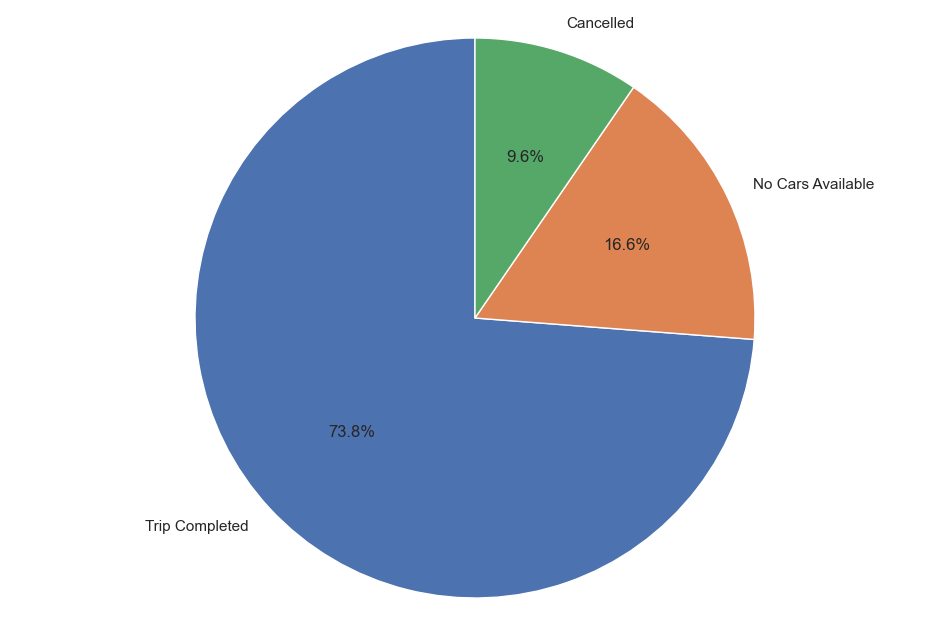

In [238]:
city = pdUberRequests.loc[(pdUberRequests.PickupPoint == "City") & (pdUberRequests.TimeSlot == "EveningRush")]
city_count = pd.DataFrame(city["Status"].value_counts())
pie_chart(city_count)

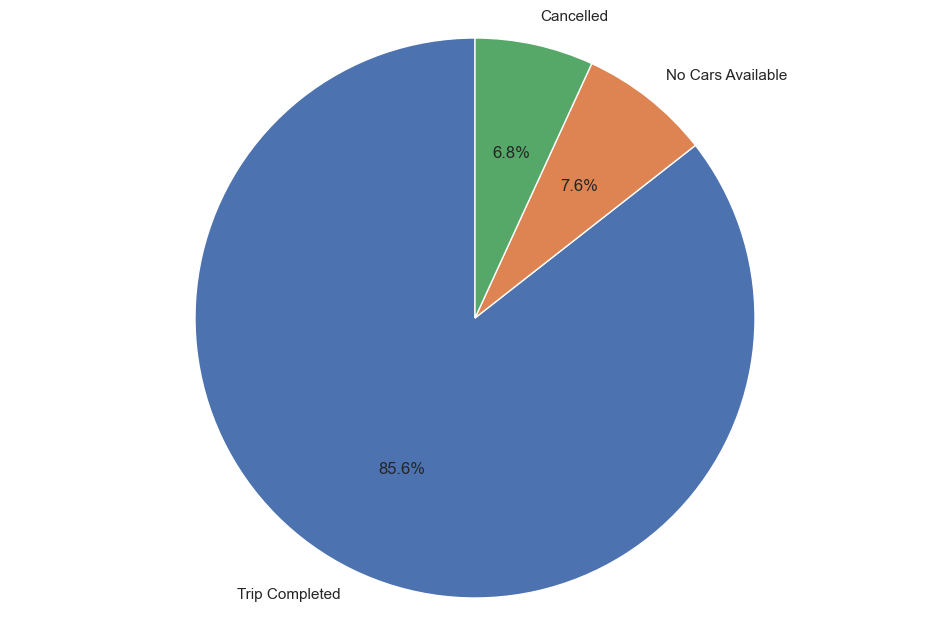

In [239]:
city = pdUberRequests.loc[(pdUberRequests["PickupPoint"] == "Airport") & (pdUberRequests["TimeSlot"] == "MorningRush")]
city_count = pd.DataFrame(city["Status"].value_counts())
pie_chart(city_count)

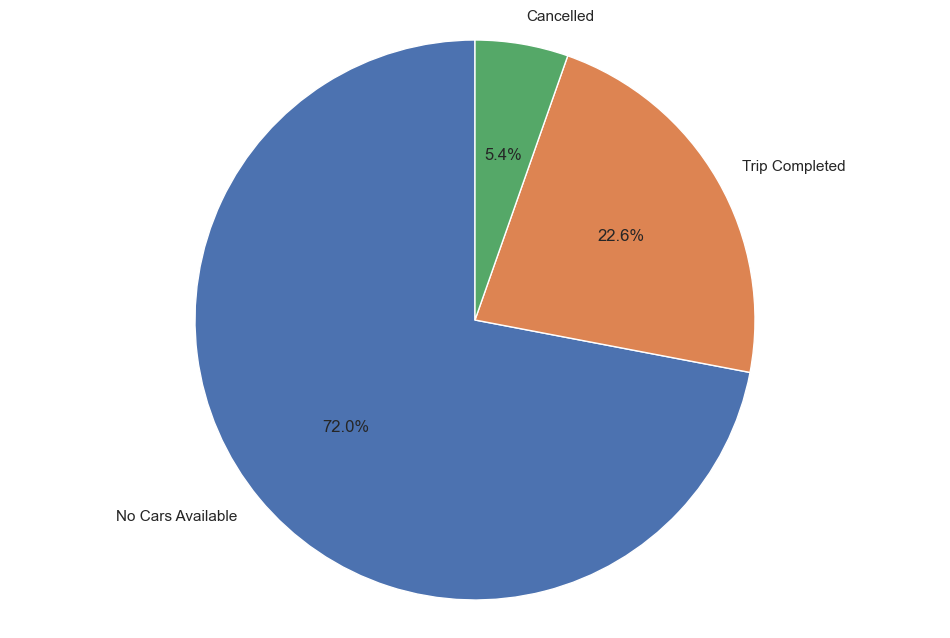

In [240]:
city = pdUberRequests.loc[(pdUberRequests["PickupPoint"] == "Airport") & (pdUberRequests["TimeSlot"] == "EveningRush")]
city_count = pd.DataFrame(city["Status"].value_counts())
pie_chart(city_count)

### 132.Visualize Distributions

132.1. Visualize the distribution of **Categorical** features.

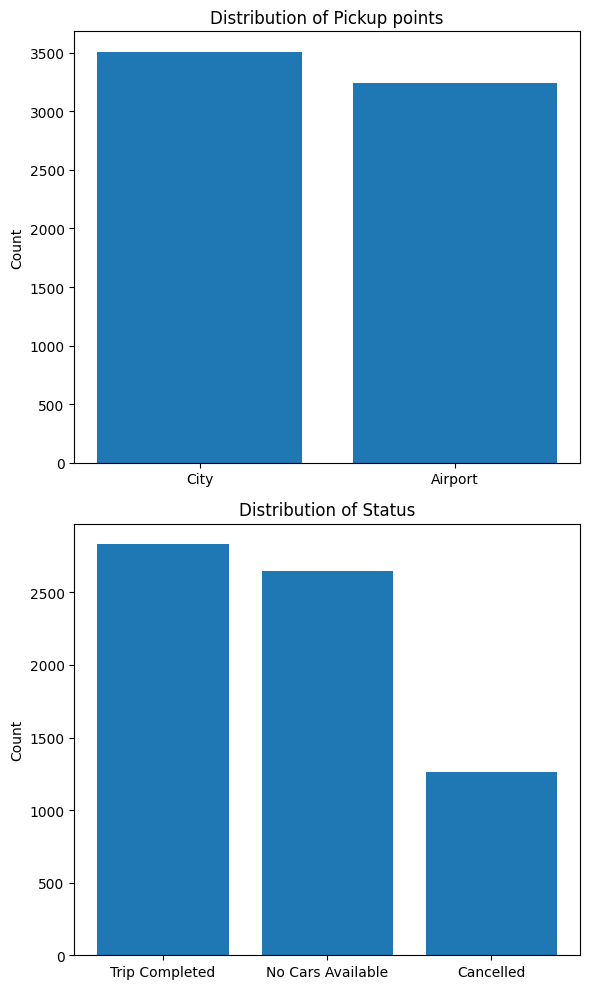

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(6, 10))

axs[0].bar(PickupPoint_distribution.index, PickupPoint_distribution.values)
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Pickup points")

axs[1].bar(Status_distribution.index, Status_distribution.values)
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Status")

plt.tight_layout()
plt.show()

132.2. Visualize the distribution of **Numerical** columns.

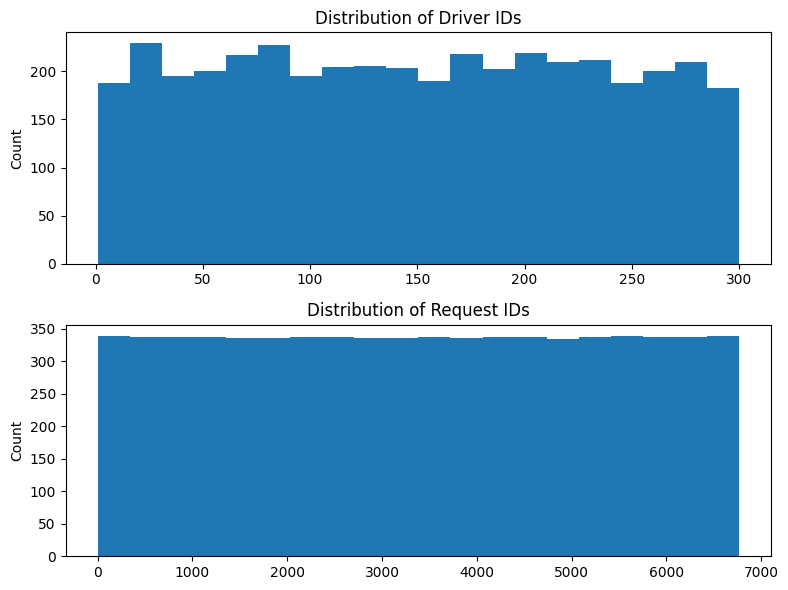

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].hist(pdUberRequests["DriverID"], bins=20)
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Driver IDs")

axs[1].hist(pdUberRequests["RequestID"], bins=20)
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Request IDs")

plt.tight_layout()
plt.show()

### 133.Visualize Relations

133.1. Display the **Covariance** matrix of the dataset.

The "covariance" measures how changes in one variable are associated with changes in a second variable. In other words, the covariance measures the degree to which two variables are linearly associated.

In [27]:
pdUberRequests.cov(numeric_only=True)

,RequestID,DriverID
RequestID,3.822415e+06,-1926.251036
DriverID,-1.926251e+03,7404.945711


133.2. Interpreting the covariance matrix:

1. The positive covariance of xx.xx between VarX and VarY length suggests...
2. The positive covariance of zz.zz between VarX and VarY length suggests...
3. The negative covariance of yy.yy between VarX and VarY length suggests...

133.3. Display the distribution of **Status** by Pickup point:

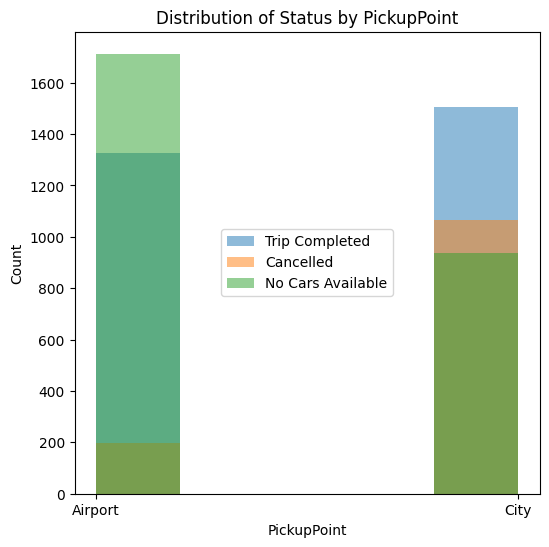

In [29]:
unique_status = pdUberRequests["Status"].unique()

fig, ax = plt.subplots(figsize=(6, 6))
for status in unique_status:
    data = pdUberRequests[pdUberRequests["Status"] == status]
    ax.hist(data["PickupPoint"], bins=5, alpha=0.5, label=status)

ax.set_xlabel("PickupPoint")
ax.set_ylabel("Count")
ax.set_title("Distribution of Status by PickupPoint")
#ax.legend()
ax.legend(loc='center')  # Center the legend
plt.show()